# CS-GY 6313 / CUSP-GX 6006: Data Visualization - Spring '24
# Homework #1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors
import pandas as pd
from scipy.io import wavfile

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Part A: Matrix Transformations (5 points):

In [2]:
####### TODO: PERFORM THE MATRIX TRANSFORMATION HERE ######

# You can modify this point (3,4) to better fit your algorithm.
original_point = [3, 4]


import numpy as np
# Constants
theta = np.radians(30)  # Convert 30 degrees to radians
dx = 3  # Translation in x
dy = -2  # Translation in y

# Rotation matrix for 30 degrees counterclockwise
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# Translation matrix for 3 units right and 2 units down
translation_matrix = np.array([
    [1, 0, dx],
    [0, 1, dy],
    [0, 0, 1]
])

# Original point in homogeneous coordinates
original_point = np.array(original_point + [1]) # Adding [1] for the homogeneous coordinate

# Apply the transformation
transformed_point = np.dot(translation_matrix,np.dot(rotation_matrix, original_point))

# The transformed point (excluding the homogeneous coordinate)
transformed_point_xy = transformed_point[:2]
transformed_point_xy


array([3.59807621, 2.96410162])

## Part B: Color Map (10 points):

In [3]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

# We read the data as a CSV file
url = "./datasets/height.csv"
data = pd.read_csv(url, delim_whitespace=True, header=None).values    

# Getting the raw column data as `Long`, `Lat`, and `Elev`
Long = data[:,0]; Lat = data[:,1]; Elev = data[:,2];

tl = 5;
tw = 2;
lw = 3;
S = 30
pts=100000;

# `np.linspace` attempts to create a certain # of points when provided a minimum, a maximum, and an expected # of points
# We generate a meshgrid that creates `np.sqrt(pts)` values between the minimum and maximum possible values 
# along the x-axis (Long) and y-axis (Lat).
[x,y] =np.meshgrid(
  np.linspace( min(Long), max(Long), int(np.sqrt(pts)) ),
  np.linspace( min(Lat), max(Lat), int(np.sqrt(pts)) )
)

# This code interpolates the original datasets (Long, Lat) and their corresponding elevations (Elev) along the 
# coordinates provided by (x,y)
z = griddata((Long, Lat), Elev, (x, y), method='linear')

# We flatten all the data from a 2D to 1D representation
x = np.matrix.flatten(x)
y = np.matrix.flatten(y)
z = np.matrix.flatten(z)

In [4]:
####### TODO: MODIFY THIS PART OF THE CODE ######
def color_map(z):
    # Normalize the elevation values to [0, 1]
    z_min, z_max = np.min(z), np.max(z)
    z_normalized = (z - z_min) / (z_max - z_min)
    
    # Initialize the colors array
    colors = np.zeros((len(z), 3))
    
    # Map the normalized elevation to a blue-to-red gradient
    # Blue (low) = [0, 0, 1], Red (high) = [1, 0, 0]
    colors[:, 0] = z_normalized  # Red channel increases with elevation
    colors[:, 2] = 1 - z_normalized  # Blue channel decreases with elevation
    
    # Green channel remains 0 to create a blue-to-red gradient
    return colors



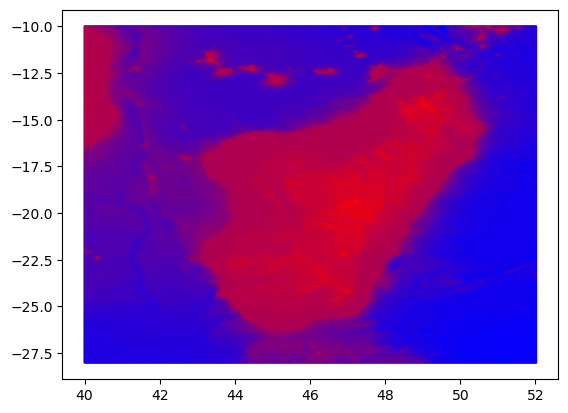

In [5]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #
plt.scatter(x,y,s=1,c=color_map(z))
plt.savefig("part_b_result.png", bbox_inches ="tight", pad_inches = 0)
plt.show()

## BONUS QUESTION: Color Frequency Analysis with Fourier Transforms (2 points):

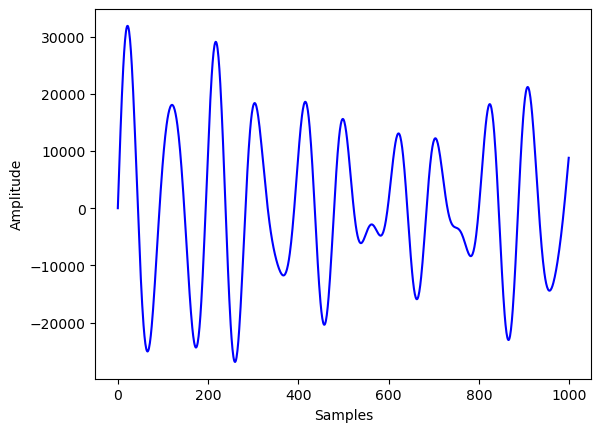

In [6]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

# The input signal has been generated with a 5-second duration, sampled at 44100 Hz
sample_rate, data = wavfile.read('./datasets/signal.wav')
duration = len(data)/sample_rate

# Plot the signal, only sampling the first 1000 data points for easy viewability
plt.plot(data[:1000], 'b')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

In [9]:
####### TODO: MODIFY THIS PART OF THE CODE ######
from scipy.fft import fft


def fourier_transform(data, sample_rate, duration):
    # Perform FFT on the data
    N = int(sample_rate * duration)  # Ensure N is an integer
    yf = fft(data)
    xf = np.linspace(0.0, sample_rate / 2.0, N // 2)
    
    # Limit the frequency range to 400Hz to 700Hz
    start_idx = np.searchsorted(xf, 400)
    end_idx = np.searchsorted(xf, 700)
    
    # Return the limited range of frequencies and their corresponding magnitudes
    return xf[start_idx:end_idx], 2.0/N * np.abs(yf[start_idx:end_idx])

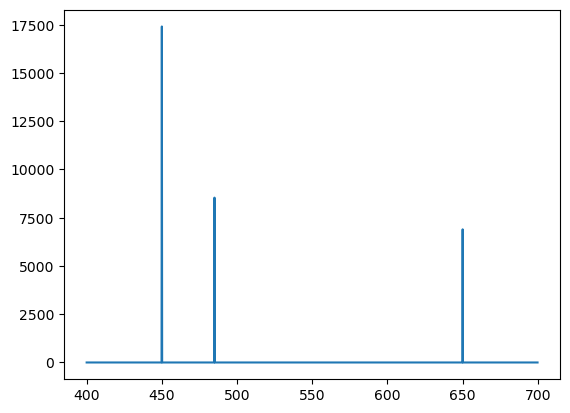

In [13]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

xf, yf = fourier_transform(data, sample_rate, duration)
plt.plot(xf, np.abs(yf))
plt.savefig("bonus_result.png", bbox_inches ="tight", pad_inches = 0)
plt.show()

The 450 color would be a violet/blueish color. 
The value closer to 500 would be green. 
tHE 650 value would be red. 